In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
%matplotlib inline



In [2]:
# Load the dataset
data =pd.read_excel('Data_Pathrise.xlsx')

# Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [4]:
data.shape

(2544, 16)

In [5]:
data.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [6]:
data.tail()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
2539,2540,Withdrawn (Failed),Design,JUN18A,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American
2540,2541,Withdrawn (Failed),Data,JAN19B,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American
2541,2542,Active,SWE,SEP18C,NaN,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American
2542,2543,Active,SWE,MAY18A,NaN,0,NaN,Master's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,2.0,10,Male,Decline to Self Identify
2543,2544,Withdrawn,SWE,OCT19A,285.0,0,Student,Master's Degree,1-2 months,Hearing back on my applications,1-2 years,Green Card,3.0,70,Male,Non-Hispanic White or Euro-American


In [7]:
# Descriptive statistics
data.describe()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,2544.000000,1928.000000,2544.000000,2326.000000,2544.000000
mean,1272.500000,136.098548,0.375786,2.182287,36.500786
std,734.533866,125.860248,0.484420,2.959273,53.654896
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,636.750000,14.000000,0.000000,0.000000,9.000000
50%,1272.500000,112.000000,0.000000,1.000000,20.000000
75%,1908.250000,224.000000,1.000000,3.000000,45.000000
max,2544.000000,548.000000,1.000000,20.000000,1000.000000


# Data Visualization

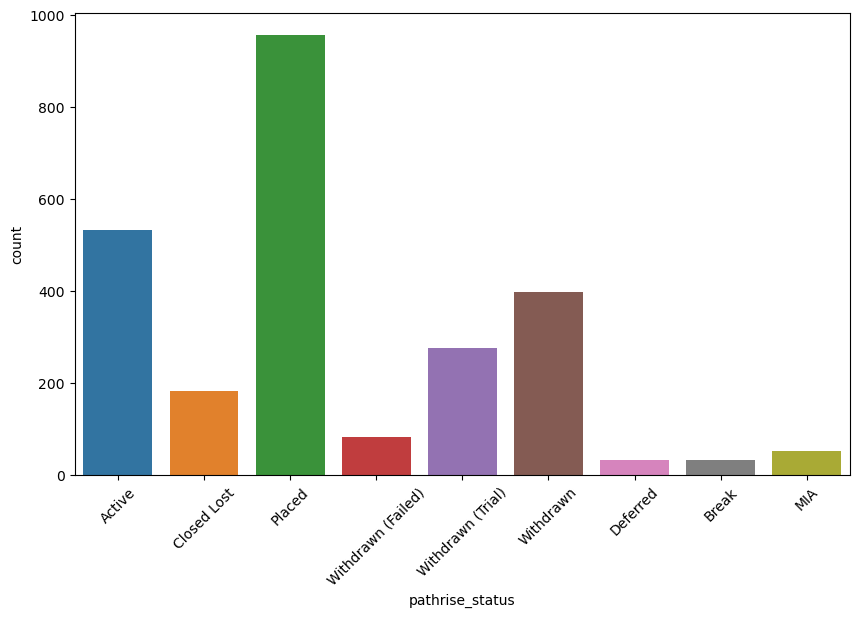

In [8]:
# Creating a bar plot for pathrise_status
plt.figure(figsize=(10, 6))
sns.countplot(x=data['pathrise_status'],data=data)

plt.xticks(rotation=45)
plt.show()




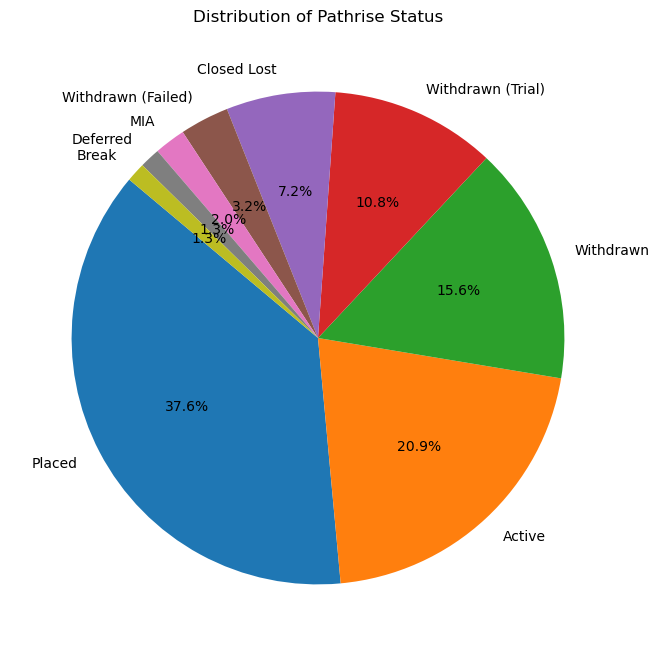

In [9]:
# Getting the counts of each pathrise_status category
status_counts = data['pathrise_status'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Pathrise Status")
plt.show()


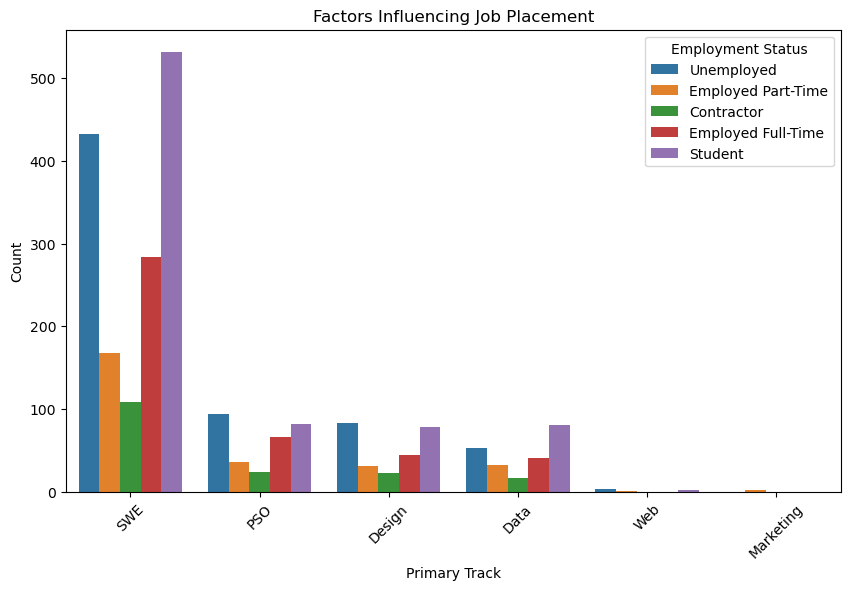

In [10]:
# Creating a countplot based on primary_track and employment_status
plt.figure(figsize=(10, 6))
sns.countplot(x=data['primary_track'], hue=data['employment_status '], data=data)
plt.title("Factors Influencing Job Placement")
plt.xlabel("Primary Track")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Employment Status")

plt.show()



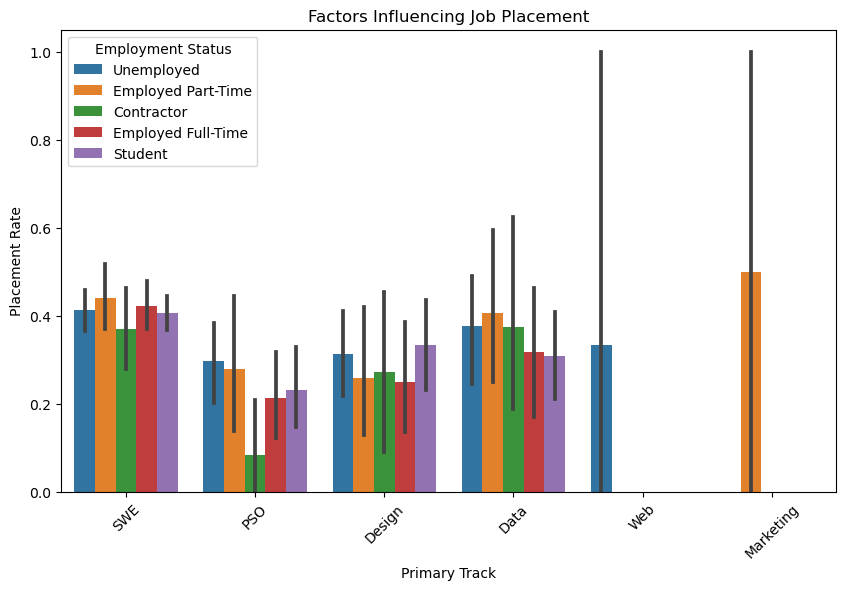

In [11]:
# Creating a bar plot based on 'primary_track' and 'placed' and 'employment_status'
plt.figure(figsize=(10, 6))
sns.barplot(x=data['primary_track'], y=data['placed'], hue='employment_status ', data=data)
plt.title("Factors Influencing Job Placement")
plt.xlabel("Primary Track")
plt.ylabel("Placement Rate")
plt.xticks(rotation=45)
plt.legend(title="Employment Status")
plt.show()


<Figure size 1200x600 with 0 Axes>

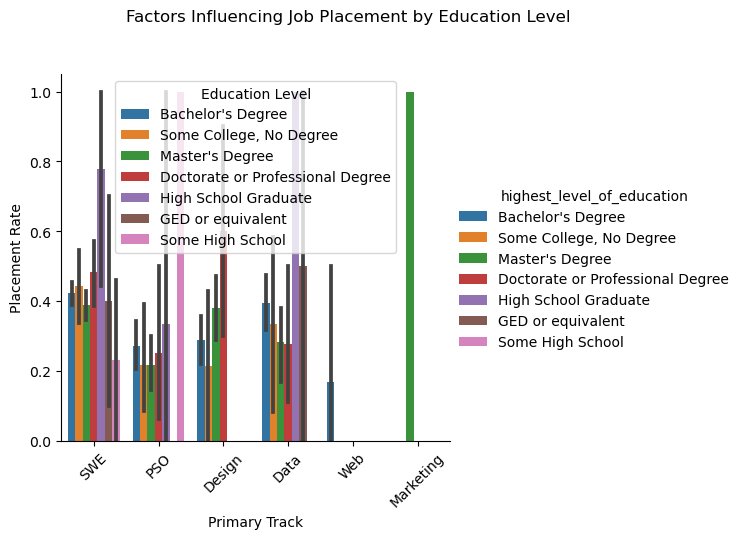

In [12]:
# Creating a categorical plot using catplot
plt.figure(figsize=(12, 6))
sns.catplot(
    x='primary_track', y='placed',
    hue='highest_level_of_education', kind='bar', data=data)
plt.subplots_adjust(top=0.85)  # Adjust the title position
plt.suptitle("Factors Influencing Job Placement by Education Level")
plt.xlabel("Primary Track")
plt.ylabel("Placement Rate")
plt.xticks(rotation=45)
plt.legend(title="Education Level")
plt.show()




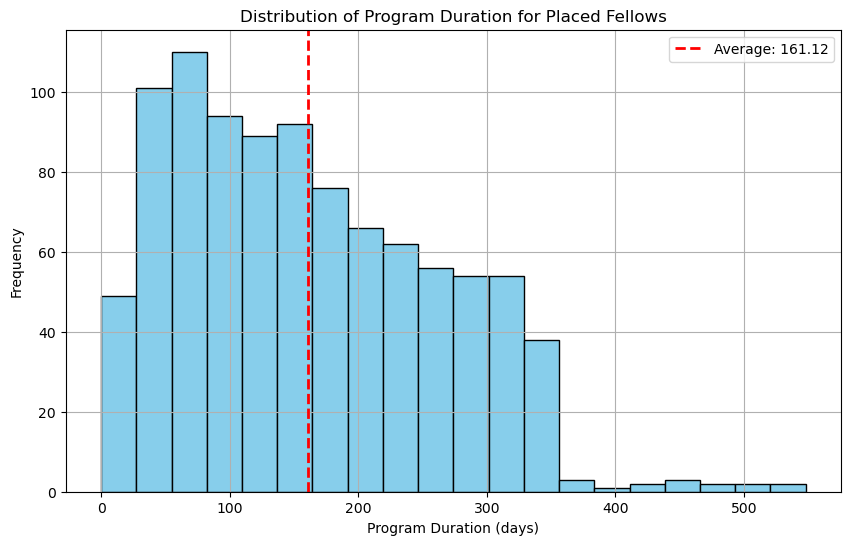

Average Duration: 161.12 days
Range of Duration: 548.00 days


In [13]:
# Filtering data for placed fellows
placed_fellows = data[data['pathrise_status'] == 'Placed']

# Getting the program_duration_days values for placed fellows
program_duration_days = placed_fellows['program_duration_days']

# Creating a histogram
plt.figure(figsize=(10, 6))
plt.hist(program_duration_days, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Program Duration for Placed Fellows")
plt.xlabel("Program Duration (days)")
plt.ylabel("Frequency")
plt.grid(True)

# Calculating average and range
average_duration = np.mean(program_duration_days)
duration_range = np.ptp(program_duration_days)  # Range (max - min)
plt.axvline(x=average_duration, color='red', linestyle='dashed', linewidth=2, label=f'Average: {average_duration:.2f}')
plt.legend()

plt.show()

print(f"Average Duration: {average_duration:.2f} days")
print(f"Range of Duration: {duration_range:.2f} days")


In [14]:
# Distribution of categorical variables
for column in data.select_dtypes(include=['object']).columns:
    print(data[column].value_counts())

Placed                956
Active                532
Withdrawn             398
Withdrawn (Trial)     276
Closed Lost           182
Withdrawn (Failed)     82
MIA                    52
Deferred               34
Break                  32
Name: pathrise_status, dtype: int64
SWE          1678
PSO           322
Design        288
Data          248
Web             6
Marketing       2
Name: primary_track, dtype: int64
JAN19A    132
JAN20A    124
DEC18A    116
FEB20A    108
AUG19C     88
OCT18B     84
OCT18A     82
AUG19B     82
JAN20B     82
JAN19B     74
MAR19A     74
OCT19A     68
SEP19B     66
JUL19A     66
JUN19B     64
DEC19A     64
FEB19A     64
NOV18A     62
NOV19A     62
SEP19A     60
AUG19A     60
OCT19B     54
SEP18C     54
JUN19A     54
SEP18B     50
AUG18A     50
SEP18A     48
APR19A     48
JUN18A     48
JUL19B     44
MAR19B     44
FEB19B     42
NOV19B     40
APR19B     34
MAY18A     32
MAR18A     30
APR18B     30
FEB18A     30
FEB20B     28
APR18A     24
MAY19B     20
MAY19A     18


### Handling missing values

In [15]:
missing_values= data.isna().sum()
missing_values

id                               0
pathrise_status                  0
primary_track                    0
cohort_tag                       8
program_duration_days          616
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
number_of_interviews           218
number_of_applications           0
gender                         492
race                            18
dtype: int64

In [16]:
# Handling missing values

data['cohort_tag'].mode().iloc[0]

'JAN19A'

In [17]:
# Filling missing values in 'cohort_tag' column with the most frequent value

data['cohort_tag'].fillna(data['cohort_tag'].mode().iloc[0], inplace=True)

In [18]:
data['program_duration_days'].value_counts()


0.0      217
13.0      34
11.0      27
12.0      25
14.0      22
        ... 
279.0      1
370.0      1
523.0      1
502.0      1
488.0      1
Name: program_duration_days, Length: 411, dtype: int64

In [19]:
median_duration = data['program_duration_days'].median()
median_duration 

112.0

In [20]:
# Filling missing values in 'program_duration_days' column with the median

data['program_duration_days'].fillna(median_duration, inplace=True)

In [21]:
# Filling missing values in 'employment_status' column with the mode
mode_employment_status = data['employment_status '].mode().iloc[0]
mode_employment_status


'Student'

In [22]:
#Filling missing values in 'employment_status' column with the mode
data['employment_status '].fillna(mode_employment_status, inplace=True)

In [23]:
# Filling missing values in 'highest_level_of_education' column with the mode
data['highest_level_of_education'].mode().iloc[0]

"Bachelor's Degree"

In [24]:
# Filling missing values in 'highest_level_of_education' column with the mode
data['highest_level_of_education'].fillna(data['highest_level_of_education'].mode().iloc[0], inplace=True)

In [25]:
# Filling missing values in 'length_of_job_search' column with 'Unknown'
data['length_of_job_search'].fillna('Unknown', inplace=True)

In [26]:
# Filling missing values in 'biggest_challenge_in_search' column with 'Unknown'
data['biggest_challenge_in_search'].fillna('Unknown', inplace=True)

In [27]:
# Filling missing values in 'professional_experience' column with 'Unknown'
data['professional_experience'].fillna('Unknown', inplace=True)

In [28]:
# Filling missing values in 'work_authorization_status' column with 'Unknown'
data['work_authorization_status'].fillna('Unknown', inplace=True)

In [29]:
# Filling missing values in 'gender' column with 'Unknown' while mode() is Male
data['gender'].fillna('Unknown', inplace=True)

In [30]:
# Filling missing values in 'race' column with 'Unknown'
data['race'].fillna('Unknown', inplace=True)

In [31]:
# Filling missing values in 'number_of_interviews' column with linearRegression but mean is 2.178668
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Data with complete 'number_of_interviews' values (to build the model)
data_with_interviews = data[data['number_of_interviews'].notna()]

# Data with missing 'number_of_interviews' values (to predict using the model)
data_to_predict = data[data['number_of_interviews'].isna()]

data_with_interviews



,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,112.0,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,112.0,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2540,Withdrawn (Failed),Design,JUN18A,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American
2540,2541,Withdrawn (Failed),Data,JAN19B,488.0,0,Student,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American
2541,2542,Active,SWE,SEP18C,112.0,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American
2542,2543,Active,SWE,MAY18A,112.0,0,Student,Master's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,2.0,10,Male,Decline to Self Identify


In [32]:
# Data with missing 'number_of_interviews' values (to predict using the model)
data_to_predict = data[data['number_of_interviews'].isna()]
data_to_predict

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
18,19,Active,SWE,JAN20A,112.0,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,Less than one year,Citizen,NaN,15,Male,East Asian or Asian American
28,29,Closed Lost,PSO,JAN20A,0.0,0,Employed Full-Time,Bachelor's Degree,6 months to a year,Hearing back on my applications,Less than one year,Citizen,NaN,45,Male,Non-Hispanic White or Euro-American
39,40,Placed,SWE,NOV19A,83.0,1,Employed Full-Time,Master's Degree,3-5 months,Getting past final round interviews,5+ years,F1 Visa/OPT,NaN,15,Male,Native American or Alaskan Native
43,44,Withdrawn (Trial),PSO,JAN20A,13.0,0,Unemployed,Bachelor's Degree,6 months to a year,Getting past mid-stage interviews,3-4 years,Citizen,NaN,60,Female,East Asian or Asian American
62,63,Placed,Data,OCT18A,223.0,1,Employed Full-Time,"Some College, No Degree",Less than one month,Getting past phone screens,5+ years,Citizen,NaN,2,Female,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,2473,Active,SWE,OCT18A,112.0,0,Unemployed,"Some College, No Degree",Less than one month,Hearing back on my applications,1-2 years,Unknown,NaN,25,Male,South Asian or Indian American
2481,2482,Placed,SWE,AUG19C,8.0,1,Student,Bachelor's Degree,6 months to a year,Hearing back on my applications,5+ years,Citizen,NaN,9,Male,Non-Hispanic White or Euro-American
2485,2486,Active,Data,JAN20A,112.0,0,Unemployed,Bachelor's Degree,1-2 months,Figuring out which jobs to apply for,1-2 years,Unknown,NaN,60,Male,East Asian or Asian American
2486,2487,Withdrawn,PSO,MAR19B,223.0,0,Student,"Some College, No Degree",Less than one month,Hearing back on my applications,3-4 years,Citizen,NaN,45,Male,East Asian or Asian American


In [33]:
# Spliting features and target
X_train = data_with_interviews.drop(columns=['number_of_interviews'])
y_train = data_with_interviews['number_of_interviews']


In [34]:

# Spliting data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# One-hot encode categorical variables in X_train and X_test
categorical_columns = ['pathrise_status', 'primary_track', 'cohort_tag', 'employment_status ', 'highest_level_of_education', 'length_of_job_search', 'biggest_challenge_in_search', 'professional_experience', 'work_authorization_status', 'gender', 'race']
encoder = OneHotEncoder(drop='first', sparse_output=False)

X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

# Training a Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train_encoded, y_train)

# Predicting missing 'number_of_interviews' values
data_to_predict_encoded = encoder.transform(data_to_predict[categorical_columns])
predicted_interviews = reg_model.predict(data_to_predict_encoded)

# Filling missing values with predictions
data.loc[data['number_of_interviews'].isna(), 'number_of_interviews'] = predicted_interviews


In [35]:
predicted_interviews

array([ 1.74531112,  1.97528111,  1.06148963,  1.75569485,  2.15175168,
        2.61205279,  1.97848821,  1.00688541,  1.80486592,  1.91761866,
        1.83469143,  2.60982807,  1.36895179,  1.66420294,  1.7315629 ,
        1.39333751,  1.5385442 ,  1.6391515 ,  3.87064288,  1.39147805,
        0.59491524,  1.91528775,  1.90016212,  1.67267659,  1.3593725 ,
        1.34460926,  2.36423567,  3.15793968,  2.04905938,  2.36174275,
        3.21491006,  1.71809311,  3.01248084,  1.94629555,  1.51412071,
        1.61722921,  2.66396102,  3.04598659,  3.26052508,  2.60861838,
        2.69923966,  3.60845768,  1.97599725,  3.53907136,  2.65203714,
        2.61082828,  2.07434088,  1.91808111,  2.74177599,  1.46821193,
        1.49654491,  1.53233201,  0.06229112,  2.256153  ,  1.75821835,
        2.89731402,  1.87023023,  2.28177535,  3.39337209,  3.05788028,
        2.54658794,  2.43920247,  1.89902927,  2.06992608,  2.43795767,
        2.75672757,  2.69022423,  1.13851986,  2.98005445,  2.11

In [36]:
data.loc[data['number_of_interviews'].isna(), 'number_of_interviews']

Series([], Name: number_of_interviews, dtype: float64)

In [37]:
set(data['number_of_interviews'])

{0.0,
 0.06229111988254221,
 0.594915241131166,
 0.6666736237018889,
 0.7939745260058779,
 0.8750609859640193,
 1.0,
 1.0068854109935077,
 1.018683481607404,
 1.0282581334038965,
 1.053455049287837,
 1.0614896319836729,
 1.067064647030577,
 1.0998030231115177,
 1.103239389271582,
 1.1276206536842572,
 1.1385198630388436,
 1.1805571939352841,
 1.2103034898156722,
 1.2696160064716961,
 1.3366192021573244,
 1.3446092562262675,
 1.3593725018758773,
 1.3689517869578482,
 1.3833284140735111,
 1.3914780476515456,
 1.3933375069411529,
 1.4092455867362093,
 1.4198254495055145,
 1.4346004224636593,
 1.468211925377826,
 1.4847477338442618,
 1.4965449084057392,
 1.5141207144502817,
 1.5221914235453666,
 1.5323320064002783,
 1.5385442040388426,
 1.5803381181558853,
 1.5908080486648934,
 1.5977881598908796,
 1.6093271998191527,
 1.6123183259915161,
 1.6172292070306162,
 1.6180980084994987,
 1.625238507756682,
 1.6391514996085865,
 1.651670063060628,
 1.6536994386990451,
 1.6540421118217115,
 1.65609

##  Data wrangeling & Analysis (EDA)

In [38]:
# Verifying that missing values have been filled
print(data.isna().sum())


id                             0
pathrise_status                0
primary_track                  0
cohort_tag                     0
program_duration_days          0
placed                         0
employment_status              0
highest_level_of_education     0
length_of_job_search           0
biggest_challenge_in_search    0
professional_experience        0
work_authorization_status      0
number_of_interviews           0
number_of_applications         0
gender                         0
race                           0
dtype: int64


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2544 non-null   object 
 4   program_duration_days        2544 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2544 non-null   object 
 7   highest_level_of_education   2544 non-null   object 
 8   length_of_job_search         2544 non-null   object 
 9   biggest_challenge_in_search  2544 non-null   object 
 10  professional_experience      2544 non-null   object 
 11  work_authorization_status    2544 non-null   object 
 12  number_of_interviews         2544 non-null   float64
 13  number_of_applicat

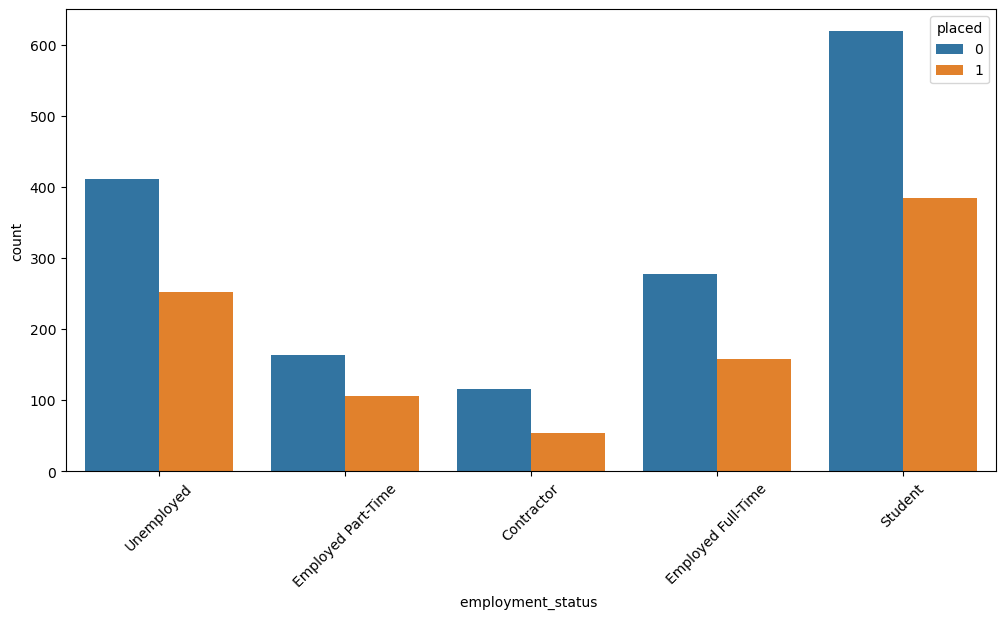

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='employment_status ', hue='placed')
plt.xticks(rotation=45)
plt.show()

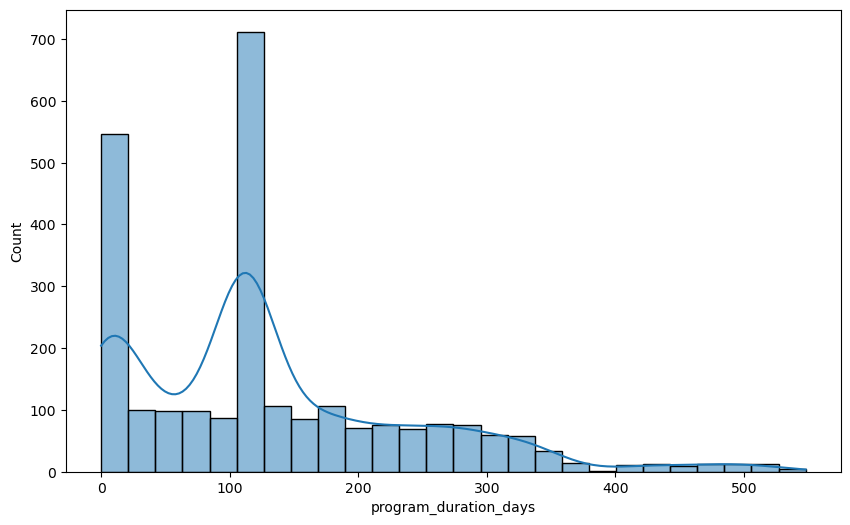

In [41]:
#plot 
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='program_duration_days', kde=True)
plt.show()

## Visualizations

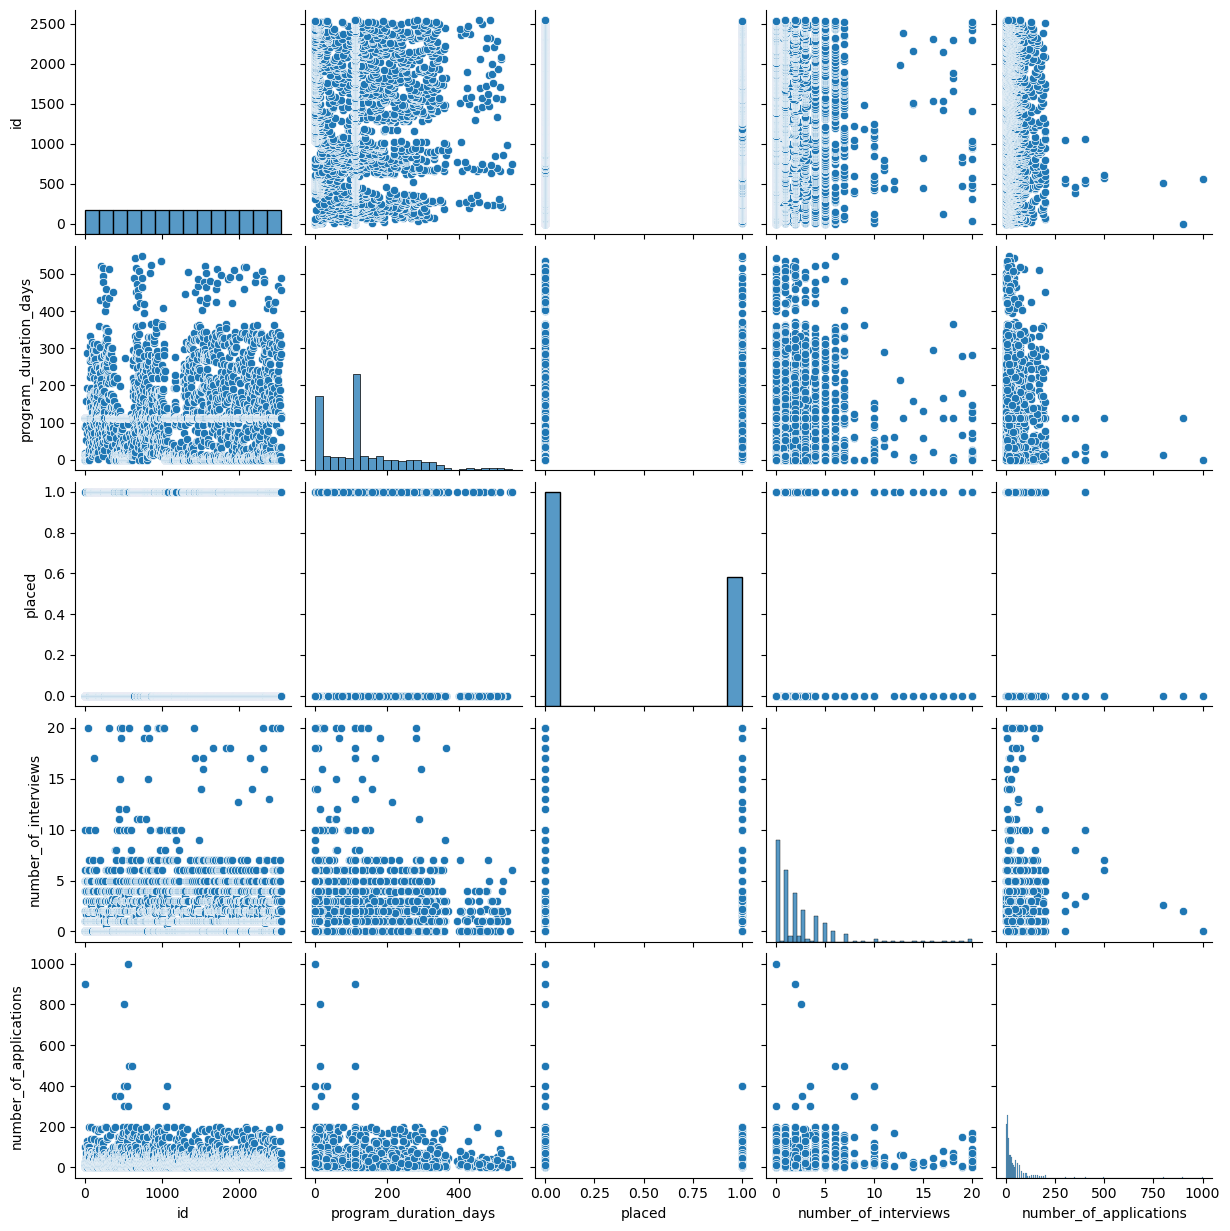

In [42]:
# Pairplot for numeric variables
sns.pairplot(data)
plt.show()

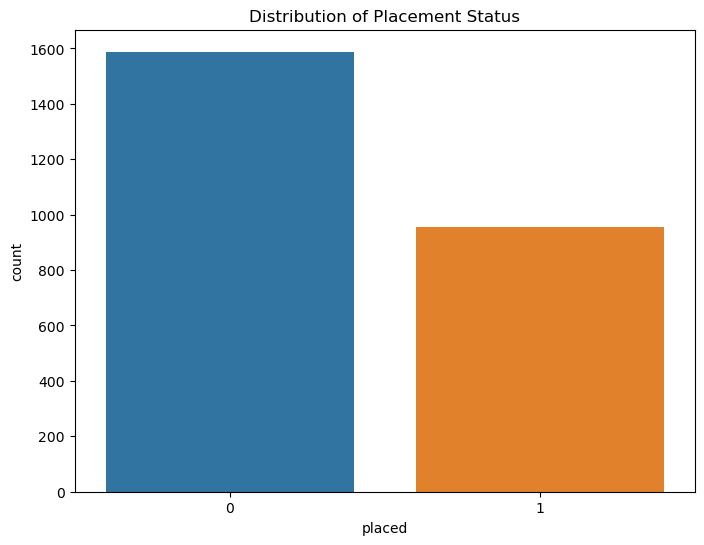

In [43]:
# Distribution of placement status
plt.figure(figsize=(8, 6))
sns.countplot(x='placed', data=data)
plt.title('Distribution of Placement Status')
plt.show()

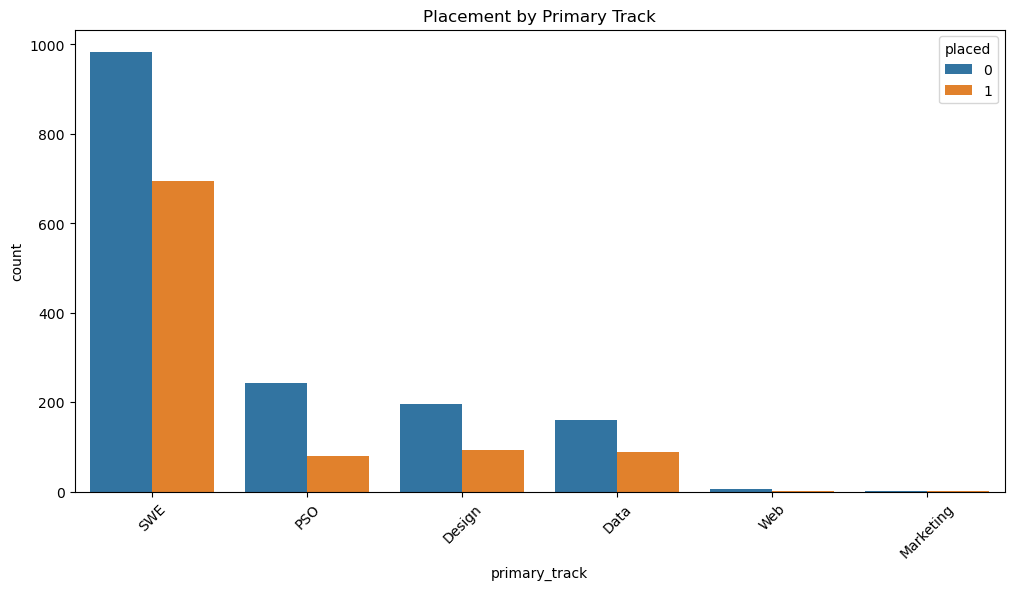

In [44]:
# Distribution of placement by primary track
plt.figure(figsize=(12, 6))
sns.countplot(x='primary_track', hue='placed', data=data)
plt.title('Placement by Primary Track')
plt.xticks(rotation=45)
plt.show()

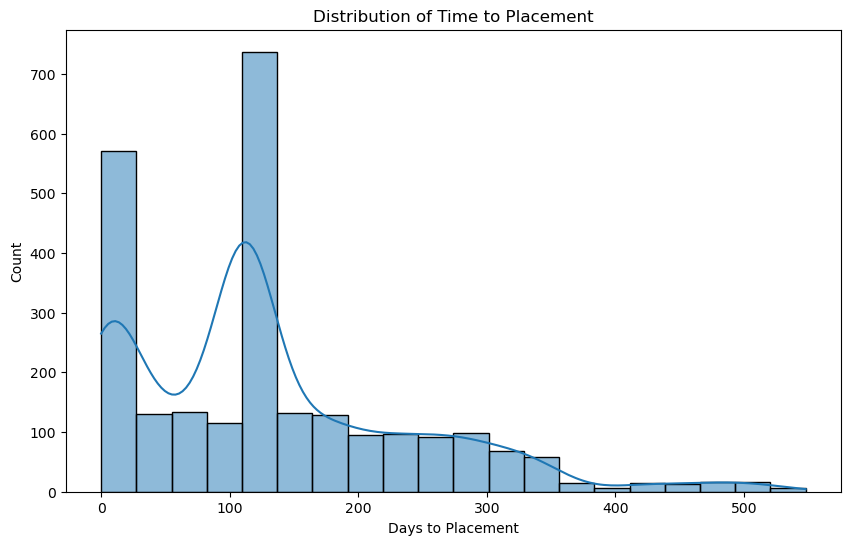

In [45]:
# Distribution of time to placement
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='program_duration_days', bins=20, kde=True)
plt.title('Distribution of Time to Placement')
plt.xlabel('Days to Placement')
plt.show()

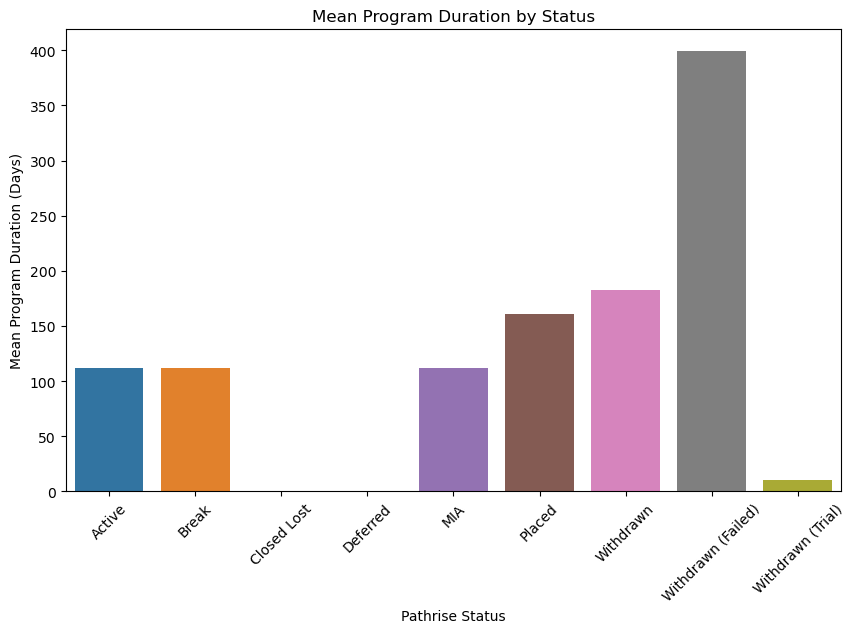

In [46]:
# Filtering relevant columns
subset_data = data[['program_duration_days', 'pathrise_status']]

# Groupping by 'pathrise_status' and calculating mean program duration
status_duration_mean = subset_data.groupby('pathrise_status')['program_duration_days'].mean()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=status_duration_mean.index, y=status_duration_mean.values)
plt.title('Mean Program Duration by Status')
plt.xlabel('Pathrise Status')
plt.ylabel('Mean Program Duration (Days)')
plt.xticks(rotation=45)
plt.show()

In [47]:
# Filtering relevant columns and exclude 'Active' fellows
data[data['pathrise_status'] != 'Active']

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
5,6,Closed Lost,SWE,AUG19A,0.0,0,Employed Full-Time,Master's Degree,1-2 months,Technical interviewing,3-4 years,Green Card,5.0,100,Male,East Asian or Asian American
6,7,Closed Lost,SWE,AUG19B,0.0,0,Employed Full-Time,Master's Degree,Less than one month,Getting past phone screens,3-4 years,Green Card,0.0,9,Male,"Black, Afro-Caribbean, or African American"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2535,2536,Closed Lost,PSO,SEP19B,0.0,0,Employed Full-Time,Master's Degree,Unknown,Figuring out which jobs to apply for,3-4 years,Citizen,0.0,20,Unknown,South Asian or Indian American
2538,2539,Withdrawn,SWE,JUL19B,118.0,0,Employed Part-Time,Master's Degree,Less than one month,Lack of relevant experience,5+ years,Other,1.0,25,Decline to Self Identify,Middle Eastern or Arab American
2539,2540,Withdrawn (Failed),Design,JUN18A,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American
2540,2541,Withdrawn (Failed),Data,JAN19B,488.0,0,Student,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American


In [48]:
# Filtering out 'Closed Lost' and 'Withdrawn (Trial)' rows
data = data[(data['pathrise_status'] != 'Closed Lost') & (data['pathrise_status'] != 'Withdrawn (Trial)')]

In [49]:
subset_data = data[data['pathrise_status'] != 'Active'][['program_duration_days', 'pathrise_status']]
subset_data

,program_duration_days,pathrise_status
4,89.0,Placed
7,19.0,Withdrawn (Failed)
11,158.0,Withdrawn
13,52.0,Withdrawn
22,93.0,Withdrawn
...,...,...
2534,119.0,Placed
2538,118.0,Withdrawn
2539,457.0,Withdrawn (Failed)
2540,488.0,Withdrawn (Failed)


In [50]:
# Defineing program stages based on the project description
def categorize_stage(row):
    if row['pathrise_status'] == 'Placed':
        return 'Placed'
    elif row['pathrise_status'] in ['Break', 'Deferred']:
        return 'Extended'
    elif row['program_duration_days'] <= 14:
        return 'Free Trial'
    elif 14 < row['program_duration_days'] <= (14 + 7*8):  # 8 weeks of core curriculum
        return 'Core Curriculum'
    elif (14 + 7*8) < row['program_duration_days'] <= 365:  # within a year
        return 'Beyond Core Curriculum'
    else:
        return 'Terminated'

# Applying the categorization to create a new column 'program_stage'
subset_data['program_stage'] = subset_data.apply(categorize_stage, axis=1)
subset_data['program_stage']

4                       Placed
7              Core Curriculum
11      Beyond Core Curriculum
13             Core Curriculum
22      Beyond Core Curriculum
                 ...          
2534                    Placed
2538    Beyond Core Curriculum
2539                Terminated
2540                Terminated
2543    Beyond Core Curriculum
Name: program_stage, Length: 1554, dtype: object

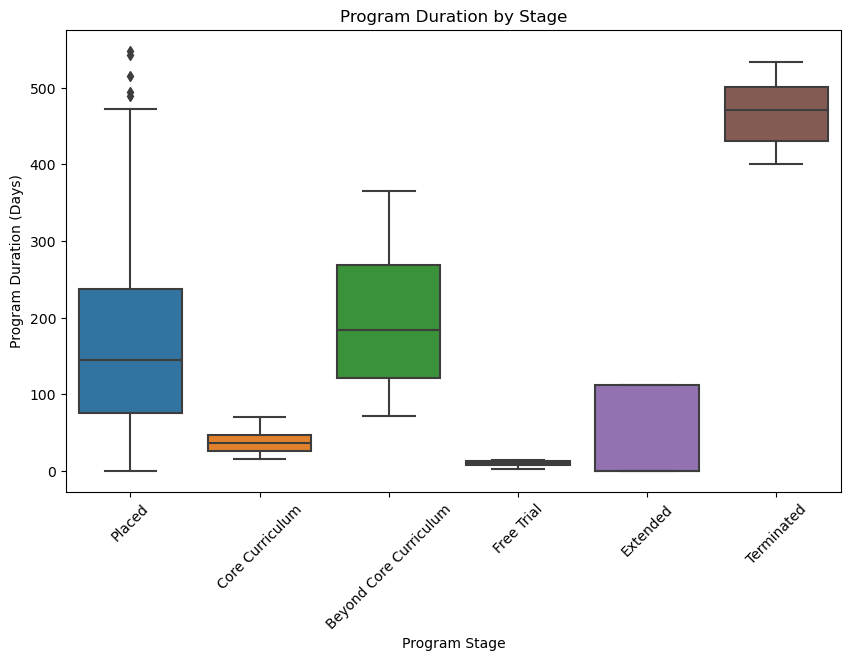

In [51]:
# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(data=subset_data, x='program_stage', y='program_duration_days')
plt.title('Program Duration by Stage')
plt.xlabel('Program Stage')
plt.ylabel('Program Duration (Days)')
plt.xticks(rotation=45)
plt.show()



In [52]:
# Calculating the percentage of fellows who were placed, withdrew, or were terminated for each stage
outcome_percentage_by_stage = subset_data.groupby('program_stage')['pathrise_status'].value_counts(normalize=True).unstack()
outcome_percentage_by_stage

pathrise_status,Break,Deferred,MIA,Placed,Withdrawn,Withdrawn (Failed)
program_stage,,,,,,
Beyond Core Curriculum,NaN,NaN,0.129032,NaN,0.823821,0.047146
Core Curriculum,NaN,NaN,NaN,NaN,0.916667,0.083333
Extended,0.484848,0.515152,NaN,NaN,NaN,NaN
Free Trial,NaN,NaN,NaN,NaN,1.000000,NaN
Placed,NaN,NaN,NaN,1.0,NaN,NaN
Terminated,NaN,NaN,NaN,NaN,0.048387,0.951613


In [53]:
# Filtering out rows with 'Closed Lost' status and those not in the free trial period
data = data[(data['pathrise_status'] != 'Closed Lost') & (data['program_duration_days'] >= 14)]

In [54]:
# Extracing month and cohort from cohort_tag
data['cohort_month'] = data['cohort_tag'].str[:3]
data['cohort_cohort'] = data['cohort_tag'].str[-1]

# Dropping the original cohort_tag column
data.drop('cohort_tag', axis=1, inplace=True)

# Encodeing the new cohort_month and cohort_cohort columns
cohort_month_encoder = LabelEncoder()
cohort_cohort_encoder = LabelEncoder()
data['cohort_month'] = cohort_month_encoder.fit_transform(data['cohort_month'])
data['cohort_cohort'] = cohort_cohort_encoder.fit_transform(data['cohort_cohort'])


In [55]:
data.columns


Index(['id', 'pathrise_status', 'primary_track', 'program_duration_days',
       'placed', 'employment_status ', 'highest_level_of_education',
       'length_of_job_search', 'biggest_challenge_in_search',
       'professional_experience', 'work_authorization_status',
       'number_of_interviews', 'number_of_applications', 'gender', 'race',
       'cohort_month', 'cohort_cohort'],
      dtype='object')

In [56]:
data.drop('id', axis=1, inplace=True)


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2012 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              2012 non-null   object 
 1   primary_track                2012 non-null   object 
 2   program_duration_days        2012 non-null   float64
 3   placed                       2012 non-null   int64  
 4   employment_status            2012 non-null   object 
 5   highest_level_of_education   2012 non-null   object 
 6   length_of_job_search         2012 non-null   object 
 7   biggest_challenge_in_search  2012 non-null   object 
 8   professional_experience      2012 non-null   object 
 9   work_authorization_status    2012 non-null   object 
 10  number_of_interviews         2012 non-null   float64
 11  number_of_applications       2012 non-null   int64  
 12  gender                       2012 non-null   object 
 13  race              

In [58]:
data.isnull().sum()

pathrise_status                0
primary_track                  0
program_duration_days          0
placed                         0
employment_status              0
highest_level_of_education     0
length_of_job_search           0
biggest_challenge_in_search    0
professional_experience        0
work_authorization_status      0
number_of_interviews           0
number_of_applications         0
gender                         0
race                           0
cohort_month                   0
cohort_cohort                  0
dtype: int64

In [59]:

# Encoding categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['pathrise_status','primary_track','cohort_month', 'cohort_cohort', 'employment_status ', 'highest_level_of_education',
                       'length_of_job_search', 'biggest_challenge_in_search', 'professional_experience',
                       'work_authorization_status', 'gender', 'race']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

    # Encoding categorical variables
label_encoder = LabelEncoder()
data["pathrise_status_encoded"] = label_encoder.fit_transform(data["pathrise_status"])




In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2012 entries, 0 to 2543
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              2012 non-null   int32  
 1   primary_track                2012 non-null   int32  
 2   program_duration_days        2012 non-null   float64
 3   placed                       2012 non-null   int64  
 4   employment_status            2012 non-null   int32  
 5   highest_level_of_education   2012 non-null   int32  
 6   length_of_job_search         2012 non-null   int32  
 7   biggest_challenge_in_search  2012 non-null   int32  
 8   professional_experience      2012 non-null   int32  
 9   work_authorization_status    2012 non-null   int32  
 10  number_of_interviews         2012 non-null   float64
 11  number_of_applications       2012 non-null   int64  
 12  gender                       2012 non-null   int32  
 13  race              

In [61]:
data

,pathrise_status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,cohort_month,cohort_cohort,pathrise_status_encoded
0,0,4,112.0,0,4,0,1,5,1,0,2.0,900,2,6,2,0,0
1,0,3,112.0,0,4,5,1,2,0,1,6.0,0,2,6,6,0,0
4,3,4,89.0,1,4,0,0,5,0,3,10.0,100,2,2,1,0,3
7,5,4,19.0,0,2,0,3,2,0,1,4.0,15,1,3,1,0,5
8,0,4,112.0,0,3,4,3,8,0,2,1.0,5,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,5,1,457.0,0,0,4,2,8,2,1,4.0,15,2,6,8,0,5
2540,5,0,488.0,0,3,4,1,5,0,3,1.0,7,2,6,6,1,5
2541,0,4,112.0,0,0,0,3,8,0,1,1.0,30,1,6,3,2,0
2542,0,4,112.0,0,3,4,3,8,0,1,2.0,10,2,1,10,0,0


In [62]:
from sklearn.preprocessing import MinMaxScaler

# Selecting numeric columns for normalization
numeric_columns = ['program_duration_days', 'number_of_interviews', 'number_of_applications']

# Creating a MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Appling Min-Max scaling to numeric columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Now our numeric features are normalized between 0 and 1


In [63]:
data

,pathrise_status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,cohort_month,cohort_cohort,pathrise_status_encoded
0,0,4,0.183521,0,4,0,1,5,1,0,0.10,1.000000,2,6,2,0,0
1,0,3,0.183521,0,4,5,1,2,0,1,0.30,0.000000,2,6,6,0,0
4,3,4,0.140449,1,4,0,0,5,0,3,0.50,0.111111,2,2,1,0,3
7,5,4,0.009363,0,2,0,3,2,0,1,0.20,0.016667,1,3,1,0,5
8,0,4,0.183521,0,3,4,3,8,0,2,0.05,0.005556,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,5,1,0.829588,0,0,4,2,8,2,1,0.20,0.016667,2,6,8,0,5
2540,5,0,0.887640,0,3,4,1,5,0,3,0.05,0.007778,2,6,6,1,5
2541,0,4,0.183521,0,0,0,3,8,0,1,0.05,0.033333,1,6,3,2,0
2542,0,4,0.183521,0,3,4,3,8,0,1,0.10,0.011111,2,1,10,0,0


## Training and Predicting

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Splitting features and targets
X = data.drop(['program_duration_days', 'placed'], axis=1)
y_placement = data['placed']
y_duration = data['program_duration_days']

# Spliting data into training and testing sets
X_train, X_test, y_train_placement, y_test_placement, y_train_duration, y_test_duration = train_test_split(
    X, y_placement, y_duration, test_size=0.2, random_state=42)


In [65]:
def plot_confusion_matrix(y, y_predict):
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax)  # 'fmt' parameter specifies formatting as integers
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.show()


# GridSearchCv LogisticRegression

In [66]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



# Defining the parameter grid for GridSearch
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10],  # Test different regularization strengths
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],  # Test different solvers
    'max_iter': [100, 200, 300]  # Test different maximum iterations
}

# Initializing the Logistic Regression model
lr = LogisticRegression(random_state=42)

# Initializing GridSearchCV
logreg_cv = GridSearchCV(lr,parameters , cv=5, verbose=2, n_jobs=-1)

# Fitting the GridSearchCV object to the training data
logreg_cv.fit(X_train, y_train_placement)

# Getting the best model from GridSearchCV
print('tuned hyperparameters:(best parameters):', logreg_cv.best_params_)
print('accuracy:' , logreg_cv.best_score_)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
tuned hyperparameters:(best parameters): {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy: 0.6022213192469186


C:\Users\fahim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
540 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\fahim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fahim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\fahim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
Va

In [67]:
accu=[]
methods=[]
accu.append(logreg_cv.score(X_test, y_test_placement))
methods.append('logistic Regression')
logreg_cv.score(X_test, y_test_placement)

0.6699751861042184

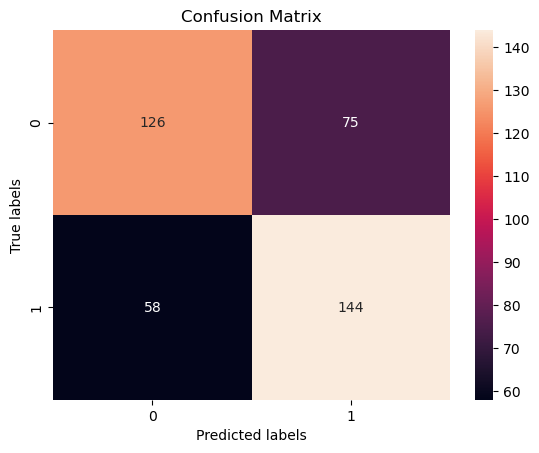

In [68]:
y_predict= logreg_cv.predict(X_test)
plot_confusion_matrix(y_test_placement, y_predict)

# Knearest neighbors

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Splitting data into features and target
X = data.drop(['program_duration_days', 'placed'], axis=1)
y_placement = data['placed']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_placement, test_size=0.2, random_state=42)



# Defining the parameter grid for GridSearch
parameters_knn = {
    'n_neighbors':[1,2,3,4,5],
    'weights':['uniform', 'distance'],
    'algorithm':['auto'],
    'leaf_size':[10,20,30]
}


knn = KNeighborsClassifier()  

# Initializing GridSearchCV
knn_cv = GridSearchCV(knn ,parameters_knn , cv=5, verbose=2, n_jobs=-1)

# Fitting the GridSearchCV object to the training data
knn_cv.fit(X_train, y_train_placement)

# Getting the best model from GridSearchCV
print('tuned hyperparameters:(best parameters):',knn_cv.best_params_)
print('accuracy:' , knn_cv.best_score_)





Fitting 5 folds for each of 30 candidates, totalling 150 fits
tuned hyperparameters:(best parameters): {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 4, 'weights': 'distance'}
accuracy: 0.8017298426888024


In [70]:
accu.append(knn_cv.score(X_test, y_test_placement))
methods.append('KNearestNeighbors')
knn_cv.score(X_test, y_test_placement)


0.8486352357320099

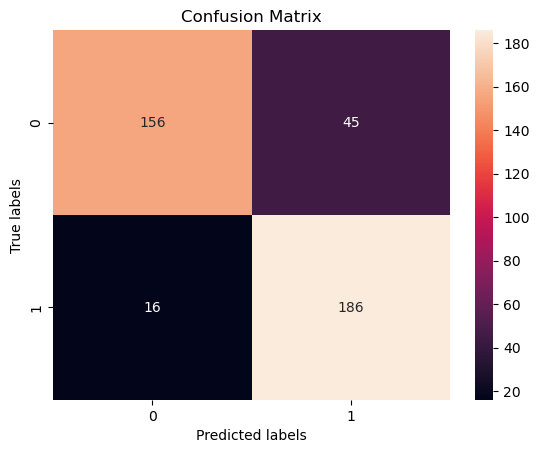

In [71]:
y_predict=knn_cv.predict(X_test)
plot_confusion_matrix(y_test_placement, y_predict)

# Decission Trees

In [72]:
from sklearn.tree import DecisionTreeClassifier

# Splitting data into features and target
X = data.drop(['program_duration_days', 'placed'], axis=1)
y_placement = data['placed']
y_duration = data['program_duration_days']


# Splitting data into training and testing sets
X_train, X_test, y_train_placement, y_test_placement, y_train_duration, y_test_duration = train_test_split(
    X, y_placement, y_duration, test_size=0.2, random_state=42)
# Initialize Random Forest model
tree =DecisionTreeClassifier()

# Defining the parameter grid for GridSearch
parameters_tree = {
    'criterion': ['gini','entropy'],
    'splitter': ['best','random'],
    'max_depth':[2],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split':[2, 5, 10]
}

# Initializing GridSearchCV for placement prediction
tree_cv = GridSearchCV(tree, parameters_tree, cv=10)

# Fitting the GridSearchCV object to the training data for placement prediction
tree_cv.fit(X_train, y_train_placement)



# Getting the best model from GridSearchCV
print('tuned hyperparameters:(best parameters):',tree_cv.best_params_)
print('accuracy:' ,tree_cv.best_score_)






C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\fahim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

tuned hyperparameters:(best parameters): {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
accuracy: 0.8109937888198757


In [73]:
accu.append(tree_cv.score(X_test, y_test_placement))
methods.append('DecissionTree')
tree_cv.score(X_test, y_test_placement)

0.5806451612903226

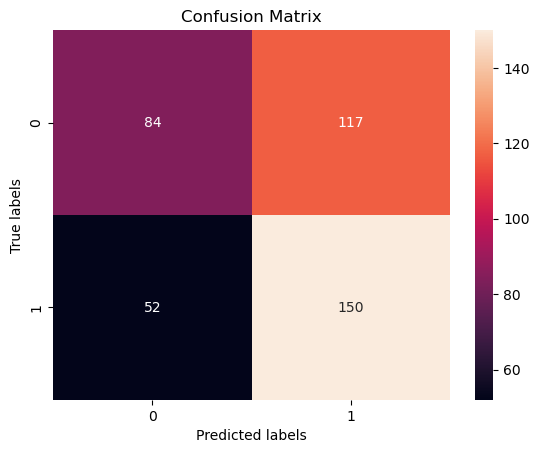

In [74]:
y_predict=tree_cv.predict(X_test)
plot_confusion_matrix(y_test_placement, y_predict)

# Support vector Machine(SVM)

In [75]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Splitting data into features and target
X = data.drop(['program_duration_days', 'placed'], axis=1)
y_placement = data['placed']
y_duration = data['program_duration_days']

# Splitting data into training and testing sets
X_train, X_test, y_train_placement, y_test_placement, y_train_duration, y_test_duration = train_test_split(
    X, y_placement, y_duration, test_size=0.2, random_state=42)


parameters_svm = {
     'C':[1,3,5],
     'kernel':['rbf','linear','sigmoid']
 } 


# Initializing the SVC model
svm = SVC()

svm_cv= GridSearchCV(svm, parameters_svm)



# Fitting the model to the training data
svm_cv.fit(X_train, y_train_placement)

# Getting the best model from GridSearchCV
print('tuned hyperparameters:(best parameters):',svm_cv.best_params_)
print('accuracy:' , svm_cv.best_score_)


tuned hyperparameters:(best parameters): {'C': 3, 'kernel': 'rbf'}
accuracy: 0.955877401753062


In [76]:
accu.append(svm_cv.score(X_test, y_test_placement))
methods.append('SupportVector Machine')
svm_cv.score(X_test, y_test_placement)

0.967741935483871

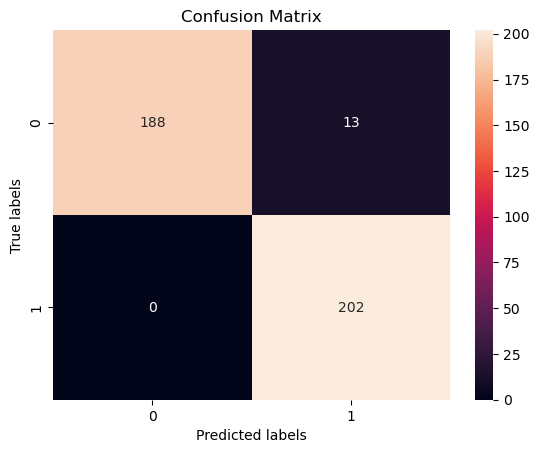

In [78]:
y_predict=svm_cv.predict(X_test)
plot_confusion_matrix(y_test_placement, y_predict)

In [79]:
print('methods:', methods)
print('accu:', accu)


methods: ['logistic Regression', 'KNearestNeighbors', 'DecissionTree', 'SupportVector Machine']
accu: [0.6699751861042184, 0.8486352357320099, 0.5806451612903226, 0.967741935483871]


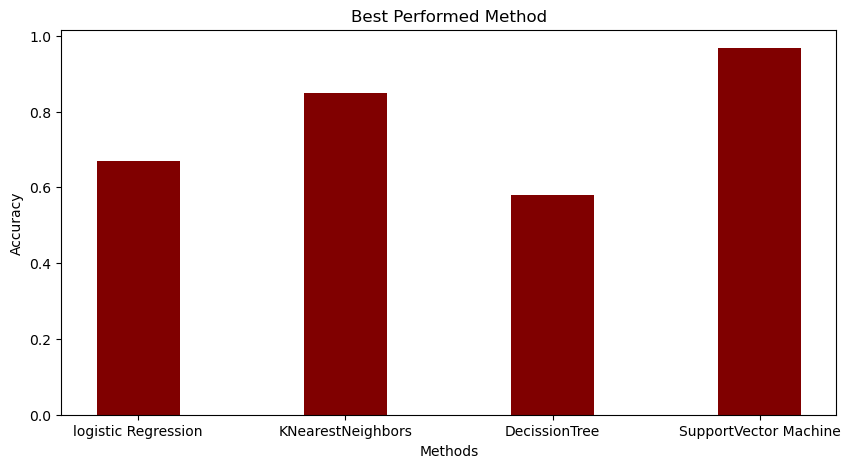

In [81]:
fig = plt.figure(figsize= (10,5))

# creating the bar plot
plt.bar(methods,accu, color='maroon', width=0.4)

plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.title('Best Performed Method')
plt.show()

## LinearRegression

In [82]:
from sklearn.metrics import mean_squared_error

# Splitting features and targets
X = data.drop(['program_duration_days', 'placed'], axis=1)
y_placement = data['placed']
y_duration = data['program_duration_days']

# Splitting data into training and testing sets
X_train, X_test, y_train_placement, y_test_placement, y_train_duration, y_test_duration = train_test_split(
    X, y_placement, y_duration, test_size=0.2, random_state=42)


# Initializing and train the Linear Regression model for duration prediction
linear_duration_model = LinearRegression()
linear_duration_model.fit(X_train, y_train_duration)

# Predicting on the test set for duration prediction
y_pred_duration = linear_duration_model.predict(X_test)

# Evaluating the model for duration prediction
mse_duration = mean_squared_error(y_test_duration, y_pred_duration)
print("Mean Squared Error for Duration Prediction:", mse_duration)



Mean Squared Error for Duration Prediction: 0.029999128440505358


Text(0.5, 1.0, 'Area Under ROC')

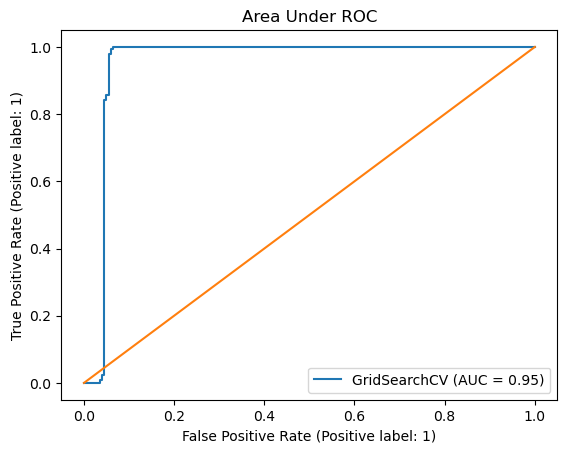

In [104]:
from sklearn.metrics import RocCurveDisplay  # Receiver Operating Characteristic Curve (ROC Curve )
RocCurveDisplay.from_estimator(svm_cv,X_test, y_test_placement)
plt.plot([0,1],[0,1])
plt.title('Area Under ROC')